In [1]:
!pip install rtree
!pip uninstall geopy
!pip install geopy

     |████████████████████████████████| 1.0MB 5.1MB/s 
Uninstalling geopy-1.17.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/geopy-1.17.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/geopy/*
Proceed (y/n)? y
  Successfully uninstalled geopy-1.17.0
     |████████████████████████████████| 122kB 5.0MB/s 


### Упражнение 1
* Реализуйте функцию `get_geodesic_distance`, рассчитывающее геодезическое расстояние между двумя точками в километрах.

In [2]:
!pip install geopandas
import matplotlib.pyplot as plt
from shapely.ops import nearest_points
from geopandas.tools import overlay
from shapely.geometry import Polygon, Point, LineString
import geopandas as gpd
import random
import numpy as np
import math
import geopy

     |████████████████████████████████| 1.0MB 6.7MB/s 
     |████████████████████████████████| 6.6MB 27.6MB/s 
     |████████████████████████████████| 15.4MB 184kB/s 


In [3]:
!pip install geoalchemy2
!pip install mapclassify

In [4]:
!git clone https://github.com/aleksei-riabykh/sberbank_data_analysis_06_07_21/  

Cloning into 'sberbank_data_analysis_06_07_21'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 145 (delta 13), reused 7 (delta 7), pack-reused 128
Receiving objects: 100% (145/145), 61.60 MiB | 24.65 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [5]:
gpd.show_versions()

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)



SYSTEM INFO
-----------
python     : 3.7.11 (default, Jul  3 2021, 18:01:19)  [GCC 7.5.0]
executable : /usr/bin/python3
machine    : Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : 3.6.2
GEOS lib   : /usr/lib/x86_64-linux-gnu/libgeos_c.so
GDAL       : 3.3.0
GDAL data dir: /usr/local/lib/python3.7/dist-packages/fiona/gdal_data
PROJ       : 8.0.1
PROJ data dir: /usr/local/lib/python3.7/dist-packages/pyproj/proj_dir/share/proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 0.9.0
pandas     : 1.1.5
fiona      : 1.8.20
numpy      : 1.19.5
shapely    : 1.7.1
rtree      : 0.9.7
pyproj     : 3.1.0
matplotlib : 3.2.2
mapclassify: 2.4.2
geopy      : 2.2.0
psycopg2   : 2.7.6.1 (dt dec pq3 ext lo64)
geoalchemy2: 0.9.2
pyarrow    : 3.0.0
pygeos     : None


In [7]:
# Сигнатура функции и пример вывода:
mipt = Point(55.9297243, 37.5199434) 
kremlin = Point(55.752023, 37.6174994)
def get_geodesic_distance(m, k):
  m1, m2=m.coords.xy
  k1, k2=k.coords.xy
  cosi=math.cos(math.radians((m1[0]+k1[0])/2))
  gs = (((m1[0]-k1[0])*111.11)**2+((m2[0]-k2[0])*cosi*111.3)**2)**.5
  return gs

get_geodesic_distance(mipt, kremlin)

20.66423346950433

### Упражнение 2

* Реализуйте функцию `get_k_nearest_neighbours_by_dist`, осуществляющую поиск `k` ближайших соседей полигона из заданного списка на основе геодезического расстояния. Добавьте две возможности учета расстояния: через ближайшие точки на границах полигонов и через центроиды полигонов.

In [8]:
# Сигнатура функции и пример вывода:

big_moscow_districts = gpd.read_file('/content/sberbank_data_analysis_06_07_21/data/big_moscow_disticts/big_moscow_districts.shp')
polygon = random.sample(big_moscow_districts['geometry'].tolist(), 1)[0]
polygons = random.sample(big_moscow_districts['geometry'].tolist(), 50)
def get_k_nearest_neighbours_by_dist(plg, plgs, k, kind):
  gs = gpd.GeoSeries(plgs)
  cent = gs.centroid
  boun = gs.boundary
  arrc=[]
  arrb=gs.geometry.distance(plg.buffer(0))
  for i in range(0,len(cent)):
    arrc.append(get_geodesic_distance(plg.centroid, cent[i])) 
  if kind=='by_centroid':
    arr=arrc
  elif kind =='by_board':
    arr=arrb 
  return gs[np.argpartition(arr,range(k))[:k]]

k_nearest_neighbours_by_board = get_k_nearest_neighbours_by_dist(polygon, polygons, k=10, kind='by_board')
k_nearest_neighbours_by_centroid = get_k_nearest_neighbours_by_dist(polygon, polygons, k=10, kind='by_centroid')
k_nearest_neighbours_by_board

34    POLYGON ((37.36254 55.45441, 37.36222 55.45238...
41    POLYGON ((37.12547 55.54996, 37.12536 55.55010...
42    POLYGON ((37.10850 55.43951, 37.11139 55.43980...
31    POLYGON ((37.13243 55.59919, 37.13442 55.60066...
0     POLYGON ((37.42782 55.31473, 37.42234 55.31236...
4     POLYGON ((37.41748 55.68078, 37.41732 55.68089...
33    POLYGON ((37.58598 55.63117, 37.58588 55.63087...
21    POLYGON ((37.55513 55.67065, 37.55431 55.66989...
18    POLYGON ((37.20236 55.23965, 37.19984 55.23772...
38    POLYGON ((37.52414 55.67367, 37.52009 55.67088...
dtype: geometry

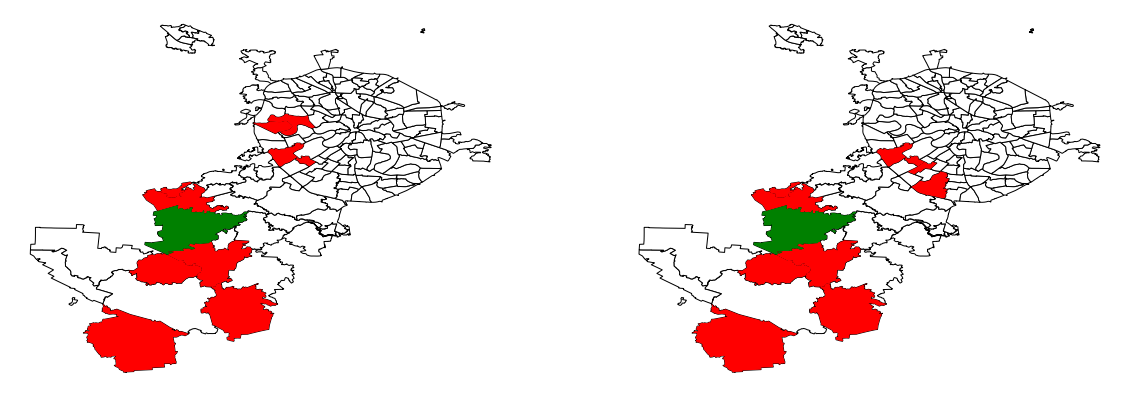

In [9]:
###

fig = plt.figure(figsize=(20, 10))

ax = plt.subplot(1, 2, 1)
big_moscow_districts.plot(ax=ax,  color='white', edgecolor='black')
k_nearest_neighbours_by_centroid.plot(ax=ax, color='red')
gpd.GeoSeries(polygon).plot(ax=ax, color='green')
ax.set_axis_off()

ax = plt.subplot(1, 2, 2)
big_moscow_districts.plot(ax=ax, color='white', edgecolor='black')
k_nearest_neighbours_by_board.plot(ax=ax, color='red')
gpd.GeoSeries(polygon).plot(ax=ax, color='green')
ax.set_axis_off()

### Упражнение 3 (*)
* Реализуйте функцию `spatial_resample`, выполняющую пространственное агрегирование. 
  На вход функция принимает:
  - `init_polygons` - изначальное гео-разбиение
  - `agg_polygons` - новое гео-разбиение, по которому будет проводится пространственное агрегирование
  - `column` - название столбца количественной переменной в `init_polygons`, которая будет агрегирована  
  - `method` - метод аггрегирования: `sum` - сумма значений, `mean` - среднее значение
  - `kind` - способ аггрегирования при частичном пересечении полигонов из `agg_polygons` и `init_polygons`, `max` - отнести значение в `column` к полигону из `agg_polygons` с которым площадь пересечения максимальна, `prop` - разбить значение в `column` пропорционально площадям пересечений

In [10]:
# Сигнатура функции и пример вывода:

grid_big_moscow = gpd.read_file('/content/sberbank_data_analysis_06_07_21/data/grid_big_moscow/grid_big_moscow.shp')
grid_big_moscow.crs = "EPSG:4326"  
grid_big_moscow['random_value'] = np.random.randint(0, 100, len(grid_big_moscow))
def spatial_resample(agg_polygons, init_polygons, method, column, kind):
  overlay = gpd.overlay(init_polygons,agg_polygons)
  spatial_join = gpd.sjoin(overlay, agg_polygons)
  spatial_join.fillna(0,inplace=True)#обработать kind
  return spatial_join.dissolve('FID_2', aggfunc=method) [['geometry', column]]

mean_resample_table = spatial_resample(agg_polygons=big_moscow_districts, init_polygons=grid_big_moscow, 
                                       method='mean', column='random_value', kind='max')
sum_resample_table = spatial_resample(agg_polygons=big_moscow_districts, init_polygons=grid_big_moscow, method='sum', column='random_value', kind='max')
sum_resample_table.head()

,geometry,random_value
FID_2,,
0,"POLYGON ((37.68676 55.86481, 37.68360 55.86273...",2892
1,"POLYGON ((37.60242 55.88311, 37.60255 55.88303...",1907
2,"POLYGON ((37.65721 55.87853, 37.65720 55.87849...",3307
3,"POLYGON ((37.53142 55.87396, 37.53190 55.87341...",3671
4,"POLYGON ((37.41701 55.87839, 37.41716 55.87831...",3428


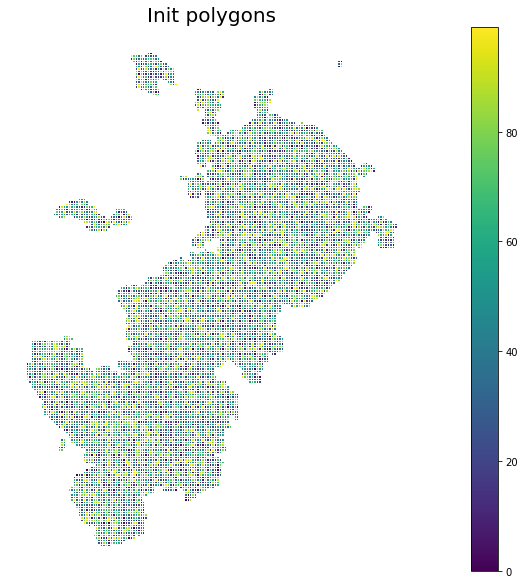

In [12]:
fig = plt.figure(figsize=(20, 10))
plt.title('Init polygons', fontsize=20)
ax = plt.gca()
grid_big_moscow.plot(ax=ax, column='random_value', cmap='viridis', edgecolor='white', legend=True)
ax.set_axis_off()

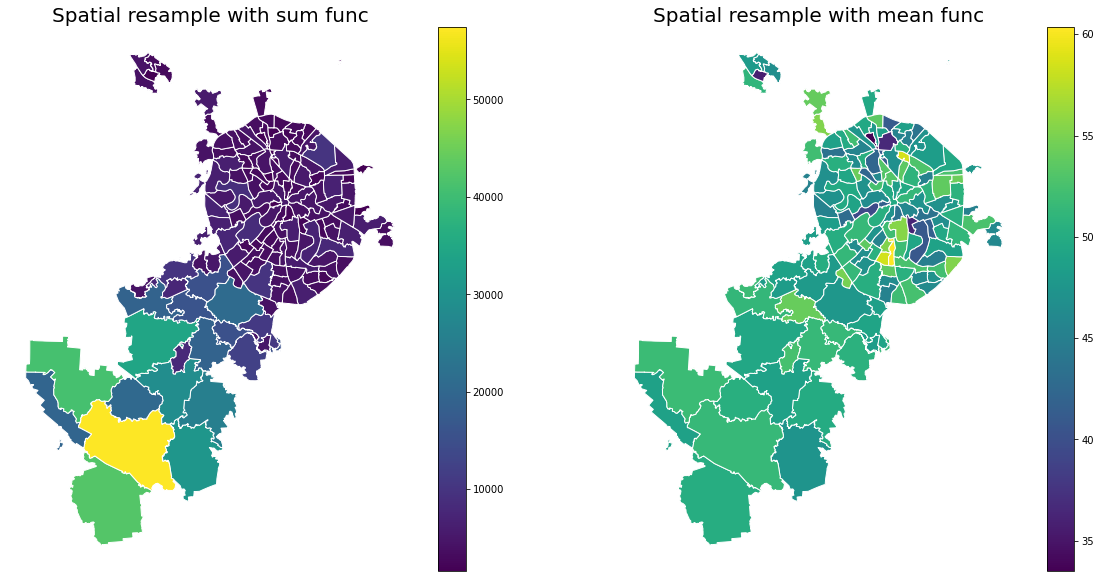

In [13]:
###

fig = plt.figure(figsize=(20, 10))

ax = plt.subplot(1, 2, 1)
plt.title('Spatial resample with sum func', fontsize=20)
sum_resample_table.plot(ax=ax, column='random_value', cmap='viridis', edgecolor='white', legend=True)
ax.set_axis_off()

ax = plt.subplot(1, 2, 2)
plt.title('Spatial resample with mean func', fontsize=20)
mean_resample_table.plot(ax=ax, column='random_value', cmap='viridis', edgecolor='white', legend=True)
ax.set_axis_off()

### Упражнение 4
* Отобразите результаты упражнений 2 и 3 (рисунки с `###`) на интерактивной карте в `Folium`

In [26]:
import folium
import json
m2 = folium.Map(location=[55.5, 37.5], # Москва
               zoom_start=9)
folium.Choropleth(polygon, fill_color='green',line_opacity=0.2,).add_to(m2)
sim=gpd.GeoSeries(k_nearest_neighbours_by_centroid).simplify(tolerance=0.0001)
sim1=gpd.GeoSeries(k_nearest_neighbours_by_board).simplify(tolerance=0.0001)
# sim2 = gpd.GeoSeries(sum_resample_table['geometry']).simplify(tolerance=0.0001)
geo=sim.to_json()
geo1=sim1.to_json()
# geo2 = sim2.to_json()
geo= folium.GeoJson(data=geo,
                         style_function=lambda x: {'fillColor': 'red','line_opacity':'0'})
geo1= folium.GeoJson(data=geo1,
                         style_function=lambda x: {'fillColor': 'blue'})
trig=sum_resample_table['random_value']
# geo2= folium.GeoJson(data=geo2,#,columns=['random_value'],key_on='FID_2',
#                      style_function=lambda x: {'fillColor': 'YlGn','color':'white'})
geo.add_to(m2)
geo1.add_to(m2)
# geo2.add_to(m2)
folium.LayerControl().add_to(m2)
# folium.Choropleth(geo_data = sum_resample_table, 
#                   data = sum_resample_table, 
#                   columns=['random_value'], 
#                   # key_on='random_value', 
#                   fill_color='RdYlBu', 
#                   line_color='white',
#                   line_weight=0,
#                   legend_name= 'E').add_to(m2)
m2